In [16]:
import numpy as np 
import matplotlib.pylab as plt

In [39]:
class UCB1Exp: 
    def __init__(self, p_true, T, warm_start:int=3): 
        self.p_true = p_true
        self.warm_start = warm_start
        self.T = T
        self.n_arms = len(p_true)
        self.ucb_terms = np.zeros((T, self.n_arms))
        self.mus = np.zeros((T, self.n_arms))
        self.cumulative_reward = np.zeros(T) 
        self.arm_count = np.zeros(self.n_arms)
        self.arm_reward = np.zeros(self.n_arms)
    
    
    def run(self): 
        
        for i in range(self.n_arms): 
            self.arm_reward[i] = (np.random.rand(self.warm_start) > (1 - self.p_true[i])).sum()
            self.arm_count[i] = self.warm_start
            
        
        for t in range(1, self.T): 
            # 
            mu = np.zeros(self.n_arms)
            for i in range(self.n_arms): 
                self.ucb_terms[t, i] = np.sqrt(np.log(t)/self.arm_count[i])
                mu[i] = self.arm_reward[i]/self.arm_count[i] + 2*self.ucb_terms[t, i]
            action = np.argmax(mu)
            reward = 1.0*(np.random.rand() > (1 - self.p_true[action]))
            
            self.cumulative_reward[t] = self.cumulative_reward[t-1]+reward
            self.arm_reward[action] += reward
            self.arm_count[action] += 1
            self.mus[t] = mu
            
        return None

In [54]:
class EGreedy: 
    def __init__(self, p_true, T, epsilon, warm_start:int=3): 
        self.p_true = p_true
        self.warm_start = warm_start
        self.T = T
        self.n_arms = len(p_true)
        self.cumulative_reward = np.zeros(T) 
        self.arm_count = np.zeros(self.n_arms)
        self.arm_reward = np.zeros(self.n_arms)
        self.epsilon = epsilon
    
    
    def run(self): 
        
        for i in range(self.n_arms): 
            self.arm_reward[i] = (np.random.rand(self.warm_start) > (1 - self.p_true[i])).sum()
            self.arm_count[i] = self.warm_start
            
        
        for t in range(1, self.T): 
            # 
            
            r = np.random.rand()
            if r >= self.epsilon: 
                action = np.argmax(self.arm_reward)
            else: 
                action = np.random.randint(self.n_arms)
            
            reward = 1.0*(np.random.rand() > (1 - self.p_true[action]))
            
            self.cumulative_reward[t] = self.cumulative_reward[t-1]+reward
            self.arm_reward[action] += reward
            self.arm_count[action] += 1
            
        return None

In [58]:
mab = UCB1Exp(p_true=[.9, .85, .3, .2], T=10000, warm_start=5)
egr = EGreedy(p_true=[.9, .85, .3, .2], T=10000, epsilon=.1, warm_start=5)
mab.run()
egr.run()

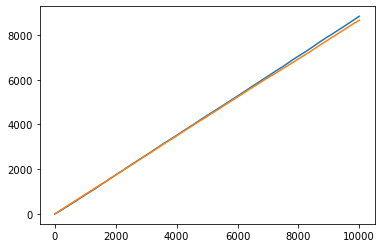

In [62]:
plt.plot(mab.cumulative_reward)
plt.plot(egr.cumulative_reward)

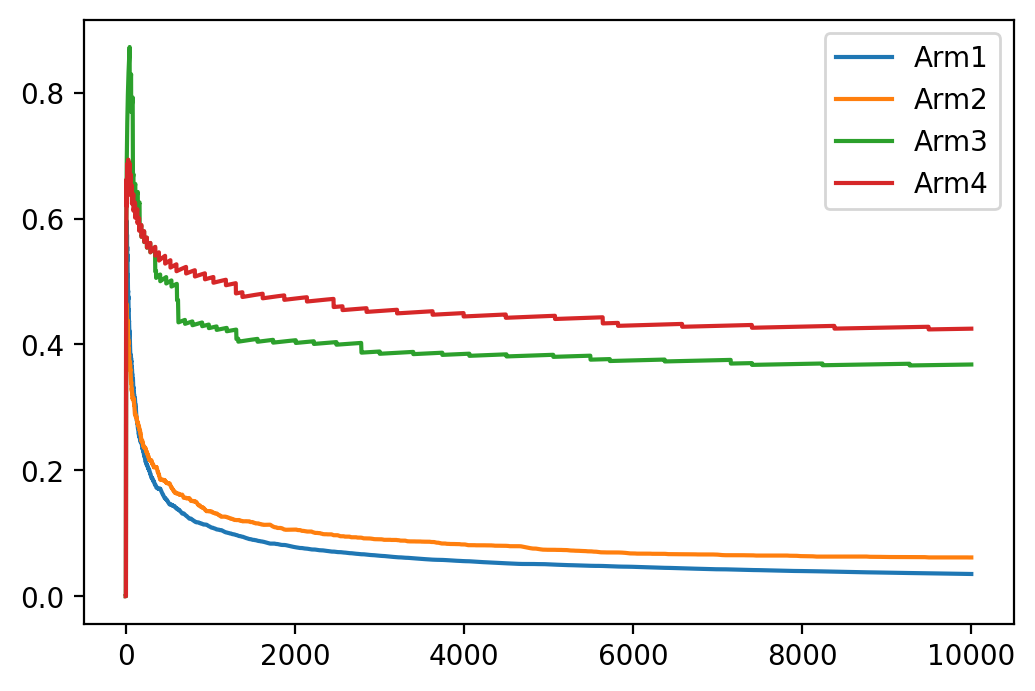

In [60]:
plt.figure(dpi=200)
plt.plot(mab.ucb_terms[:,0], label='Arm1')
plt.plot(mab.ucb_terms[:,1], label='Arm2')
plt.plot(mab.ucb_terms[:,2], label='Arm3')
plt.plot(mab.ucb_terms[:,3], label='Arm4')
plt.legend()

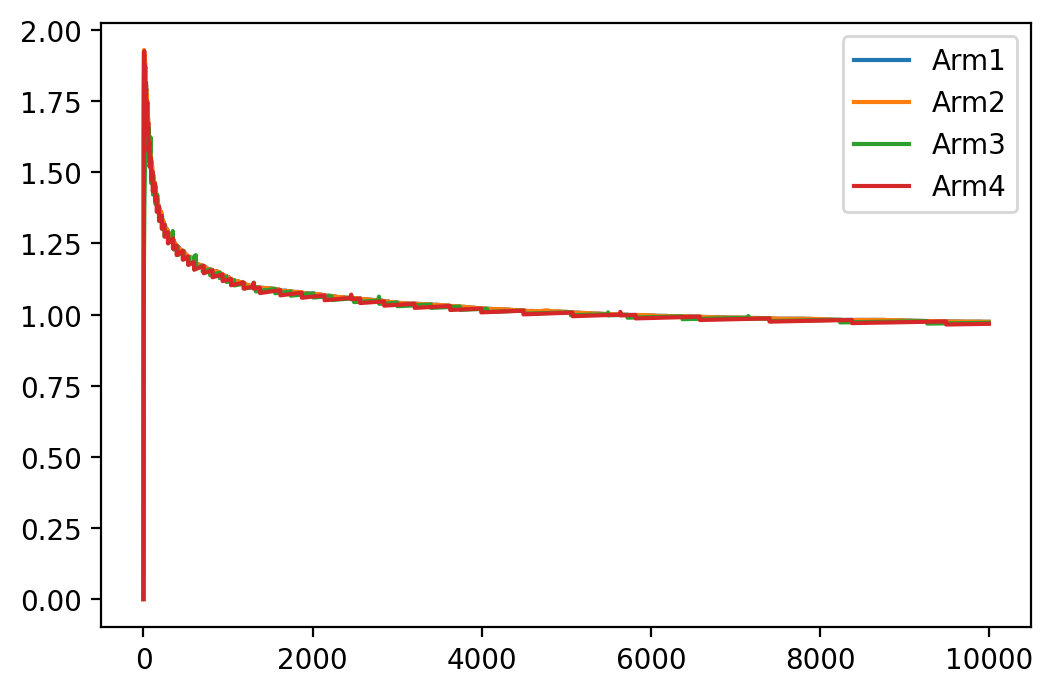

In [61]:
plt.figure(dpi=200)
plt.plot(mab.mus[:,0], label='Arm1')
plt.plot(mab.mus[:,1], label='Arm2')
plt.plot(mab.mus[:,2], label='Arm3')
plt.plot(mab.mus[:,3], label='Arm4')
plt.legend()

In [49]:
mab.arm_reward

array([7272., 2465.,  145.,  105.])